In [ ]:
from demo.displays import Demo2

In [ ]:
from demo import SeedZoneObserver, CoordGenerator

In [ ]:
observer = SeedZoneObserver()

observer.run()

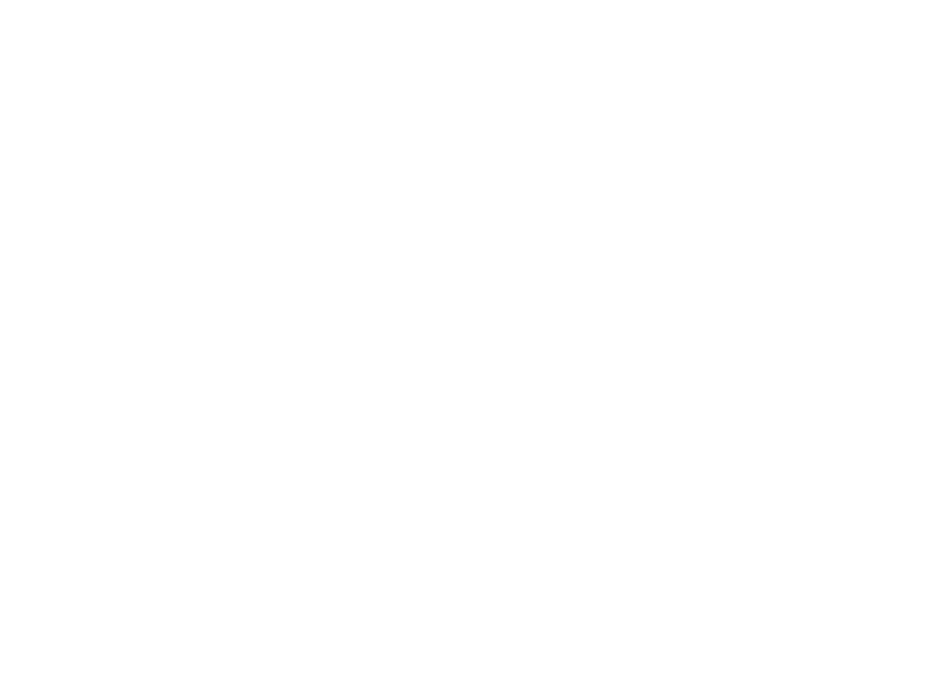

In [3]:
CoordGenerator.save_draw_map()

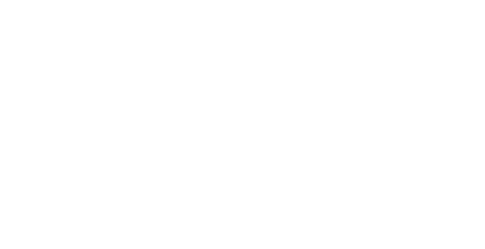

In [31]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

FEATURE_COL = ['danceability', 'energy', 'key', 'loudness', 'speechiness',
               'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

plt.plot(FEATURE_COL,observer.kmeans.datas.T, color="white", linewidth=0.25)

ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='y', colors='white')

plt.savefig("/Users/formegusto/Desktop/seedzone-features.png", transparent=True)

# plt.show()

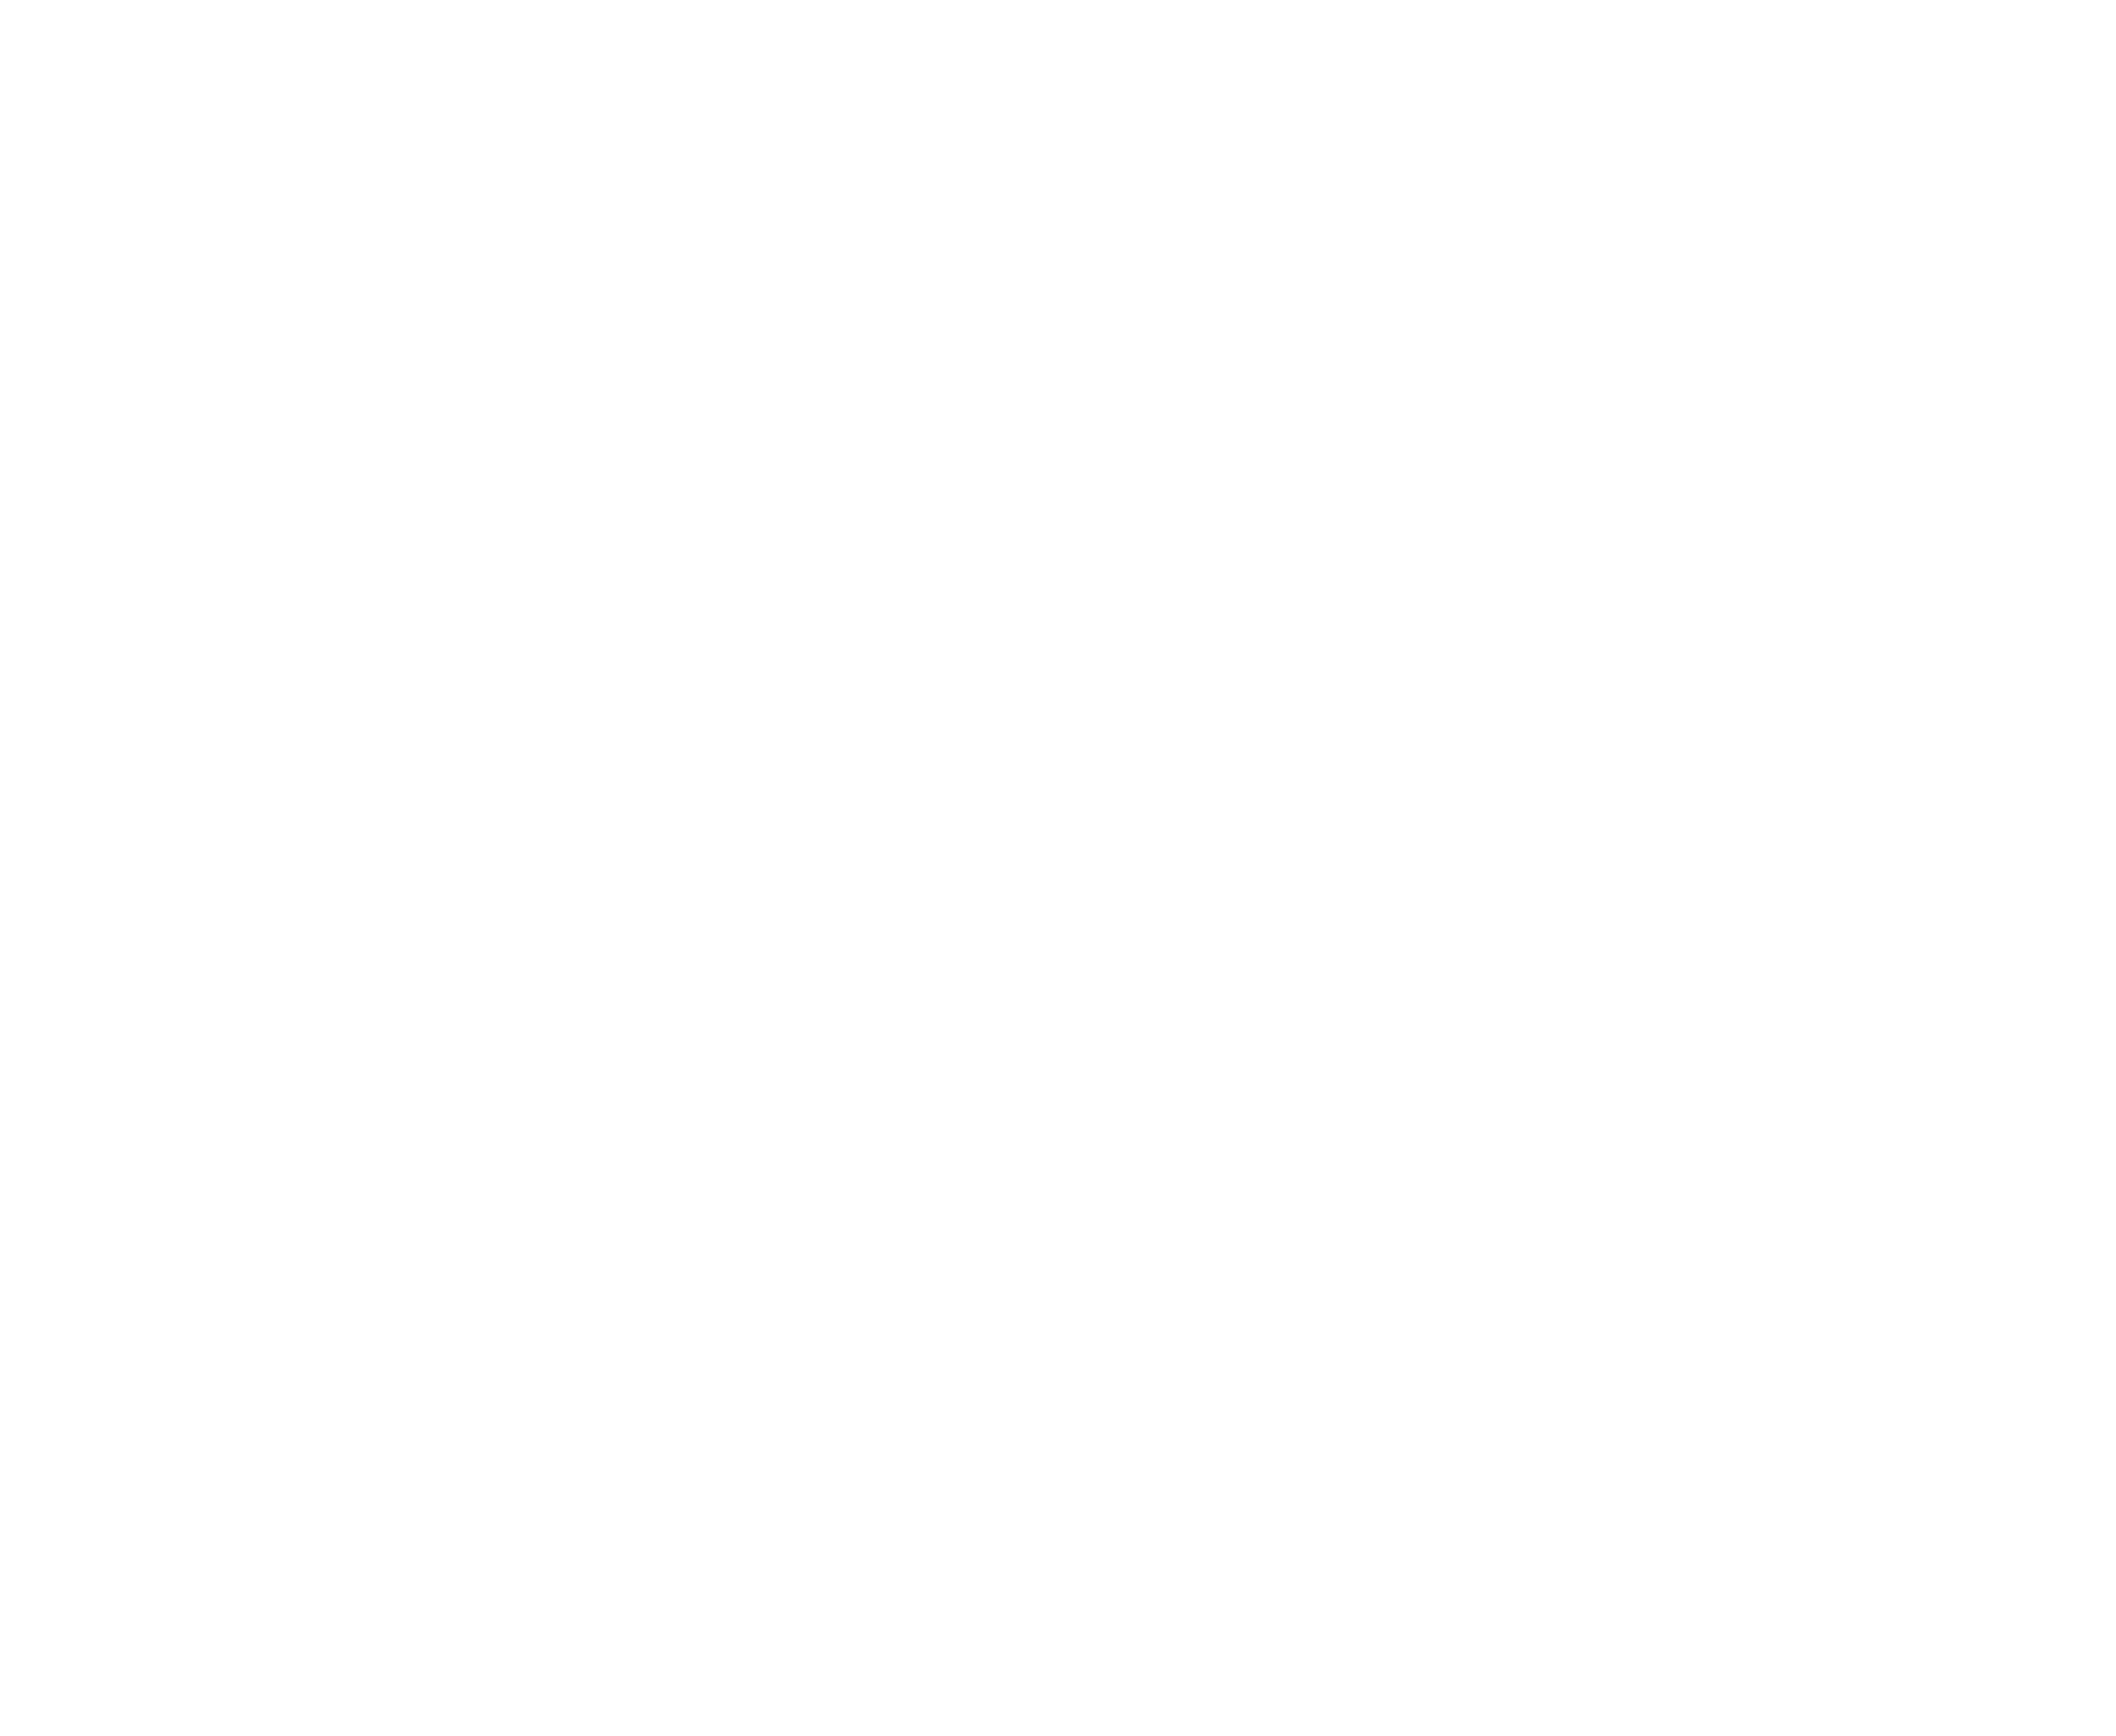

In [17]:
observer.kmeans.save_draw_cluster()

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from math import pi

labels = np.array([ 6.  ,0. , 8. , 5. , 4. ,11. , 1.,  7. , 3. ,10.,  2.,  9., 12.], dtype="int")
targets = np.array([])

x_labels = ["클러스터 {}".format(_) if _ in targets else "" for idx,_ in enumerate(labels)]

print(x_labels)

num_labels = len(labels)
angles = [x/float(num_labels)*(2*pi)
          for x in range(num_labels)]
angles += angles[:1]

matplotlib.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(1,1,1, polar=True)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
ax.set_yticklabels('')
ax.tick_params(axis='x', which='major', pad=15, labelsize=20)
plt.xticks(angles[:-1])

ax.set_ylim(0, 100)

plt.show()

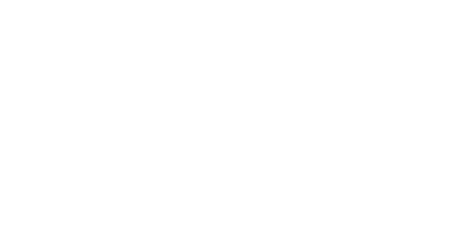

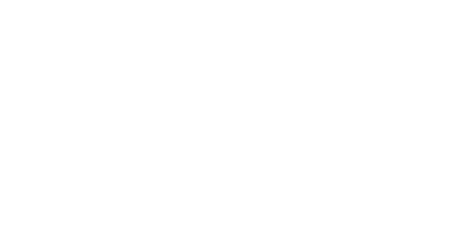

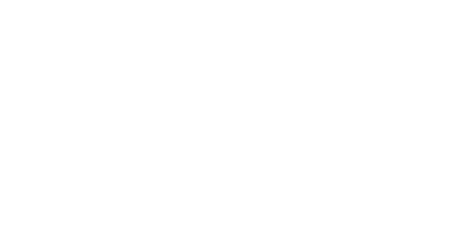

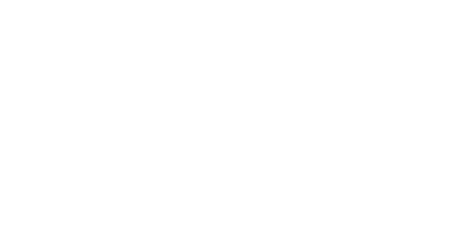

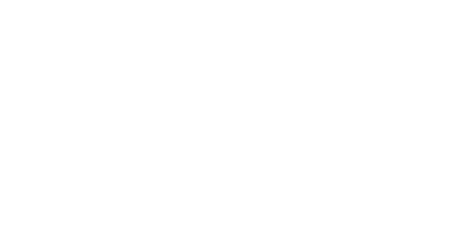

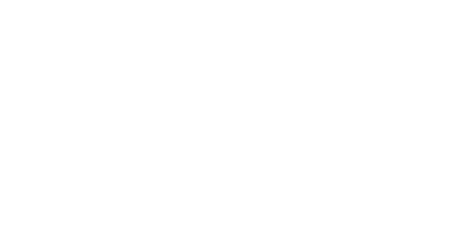

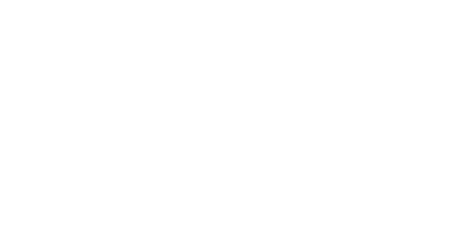

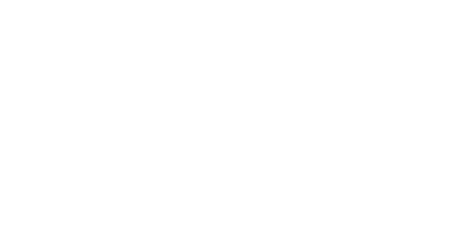

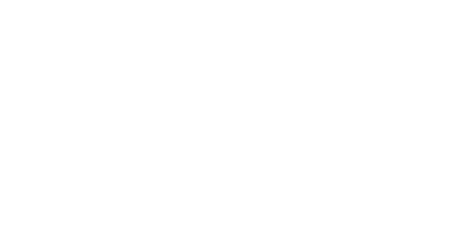

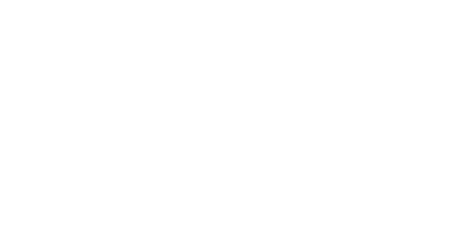

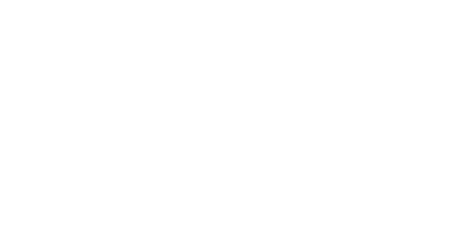

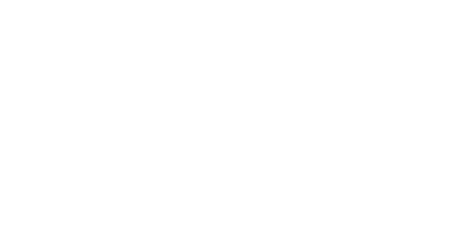

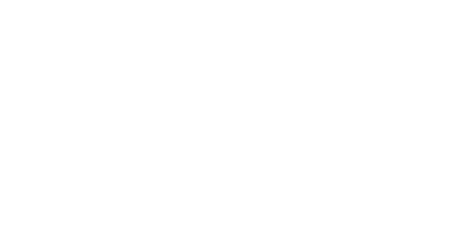

In [60]:
import matplotlib
import matplotlib.pyplot as plt

for target_idx in range(len(observer.kmeans.clusters_)):
    matplotlib.rc('font', family='AppleGothic')
    plt.rcParams['axes.unicode_minus'] = False

    FEATURE_COL = ['danceability', 'energy', 'key', 'loudness', 'speechiness',
                   'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
    fig = plt.figure(figsize=(8,4))
    ax = fig.add_subplot(111)

    ax.spines['bottom'].set_color('white')
    ax.spines['top'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.spines['left'].set_color('white')

    plt.plot(observer.kmeans.clusters_[target_idx], color="white", linewidth=4)
    plt.plot(observer.kmeans.datas[observer.kmeans.labels_ == target_idx].T, color="white", linewidth=2)

    ax.set_xticks([])
    ax.set_yticks([])
    ax.xaxis.label.set_color('white')
    ax.tick_params(axis='x', colors='white')
    ax.yaxis.label.set_color('white')
    ax.tick_params(axis='y', colors='white')

    plt.savefig("/Users/formegusto/Desktop/cluster-features_{}.png".format(target_idx), transparent=True)

array([[0.19815062998261415, 0.35054347826086957, 0.632755974566981, 0.0,
        0.18181818181818182, 0.06433637284701116, 0.68345923673109,
        0.46166736489317134, 0.18320945727175272, 0.43219092862798325],
       [0.4913868434820365, 0.654891304347826, 0.6579697434773077, 0.0,
        0.0, 0.05547112462006079, 0.6733052094574707,
        0.032677000418935905, 0.1463272486563105, 0.5385137427892773],
       [0.15568193699304264, 0.4714673913043478, 0.8355623766717826, 0.0,
        0.09090909090909091, 0.05483789260385005, 0.8821249877366821,
        0.8114788437369082, 0.397559413741249, 0.7160954643139916],
       [0.32454554959443416, 0.6019021739130436, 0.7215522911642184, 0.0,
        0.0, 0.49848024316109424, 0.7071029137643481,
        0.19983242563887726, 0.18284250591799, 0.4389774912340233],
       [0.19815062998261415, 0.44701086956521735, 0.7873273404955055,
        0.0, 0.0, 0.27684903748733536, 0.8213479839105269,
        0.07184750733137829, 0.2546642395113072, 0.1

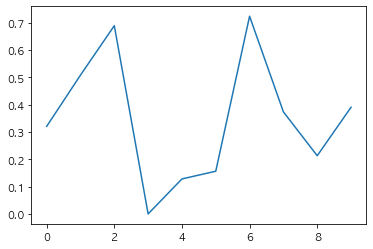

In [21]:
plt.figur

plt.plot(observer.kmeans.clusters_[0])

In [59]:
observer.kmeans.sorting()

[ 5  6  7  0  5  5  2  6  7  2  7  9  3 10  7  9  0  5  7  7  9  9 12  2
  4  5  2  9  7  2  2  9  9  7  7  7  4  2  0  0  9  7  2  6  0 11  2  5
  7  6 12  5  2  7  3  5  5  7  9 10  6  9  5  6  7  7 11  6  9  2  6  3
  2  7  0 12  6  2  5  7 11  0  7  8  6 10  7  7  5  0  7  9  5  5  2  5
 10 12  0 10  2  7  0  9  5  2  3 12  9 10  4 12  0  2  7  9  0  0  7 11
  0  5  7  4  9 11 12  9 10 11  7  9  5  0  9  5 12 12 10  7  4  7  7  7
  9  9  5  2  0  7  7  2  9 12 10  7  5  9  5 12  7  4  7  5 11  9  9 12
 11  4  9  5 12  7  2  9  9  7  7  9 12  7  7  0 12  9  9  7  7  5  2  9
  2  9 11 10 10  3 10  8 11 10  4 11  9 11  3  8  2  3  8 11  8  7  8  5
  3  3  4  3  3  8 11  4  3  4  3 11  3  3  8  3 11  3  4 11  9  3 11 11
 10  4 10  3 11  8 11  3  7  7  9  9  3 10  4 11  5 12  0  2  7  7  2 11
  2  5 10  0  7 11 11  9  2 12  9  7  0  3  7  7  9 10  7  8 11  9 12  3
  3  3  3  9  9  2  4  3  3  3 11  7  3  9  8 12  7  7 10  9  9 10 10  7
  7  3  3  1  0  7 12 10 12  9  3  2  9  0  2  7  4

['', '', '', '', '', '', '', '', '', '', '', '', '']
['polar', 'start', 'end', 'inner']


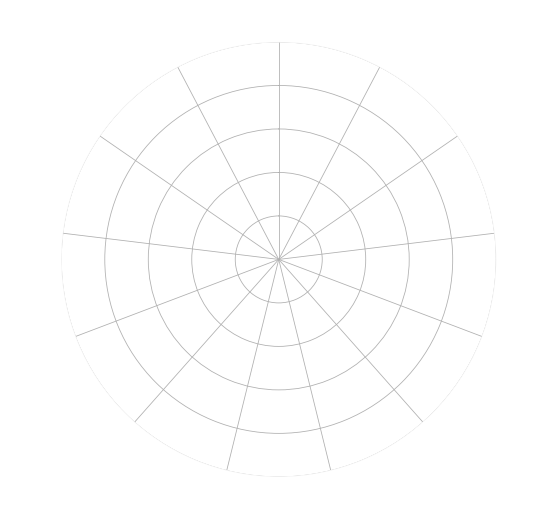

In [58]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from math import pi

labels = np.array([ 6.  ,0. , 8. , 5. , 4. ,11. , 1.,  7. , 3. ,10.,  2.,  9., 12.], dtype="int")
targets = np.array([])

x_labels = ["클러스터 {}".format(_) if _ in targets else "" for idx,_ in enumerate(labels)]

print(x_labels)

num_labels = len(labels)
angles = [x/float(num_labels)*(2*pi)
          for x in range(num_labels)]
angles += angles[:1]



matplotlib.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(1,1,1, polar=True)


ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
ax.set_yticklabels('')
ax.tick_params(axis='x', which='major', pad=15, labelsize=20)
plt.xticks(angles[:-1])

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

ax.set_ylim(0, 100)

ax.spines['polar'].set_color("white")
ax.spines['inner'].set_color("white")
ax.spines['start'].set_color("white")
ax.spines['end'].set_color("white")

print(list(ax.spines.keys()))
plt.savefig("/Users/formegusto/Desktop/polar.png".format(target_idx), transparent=True)
plt.show()

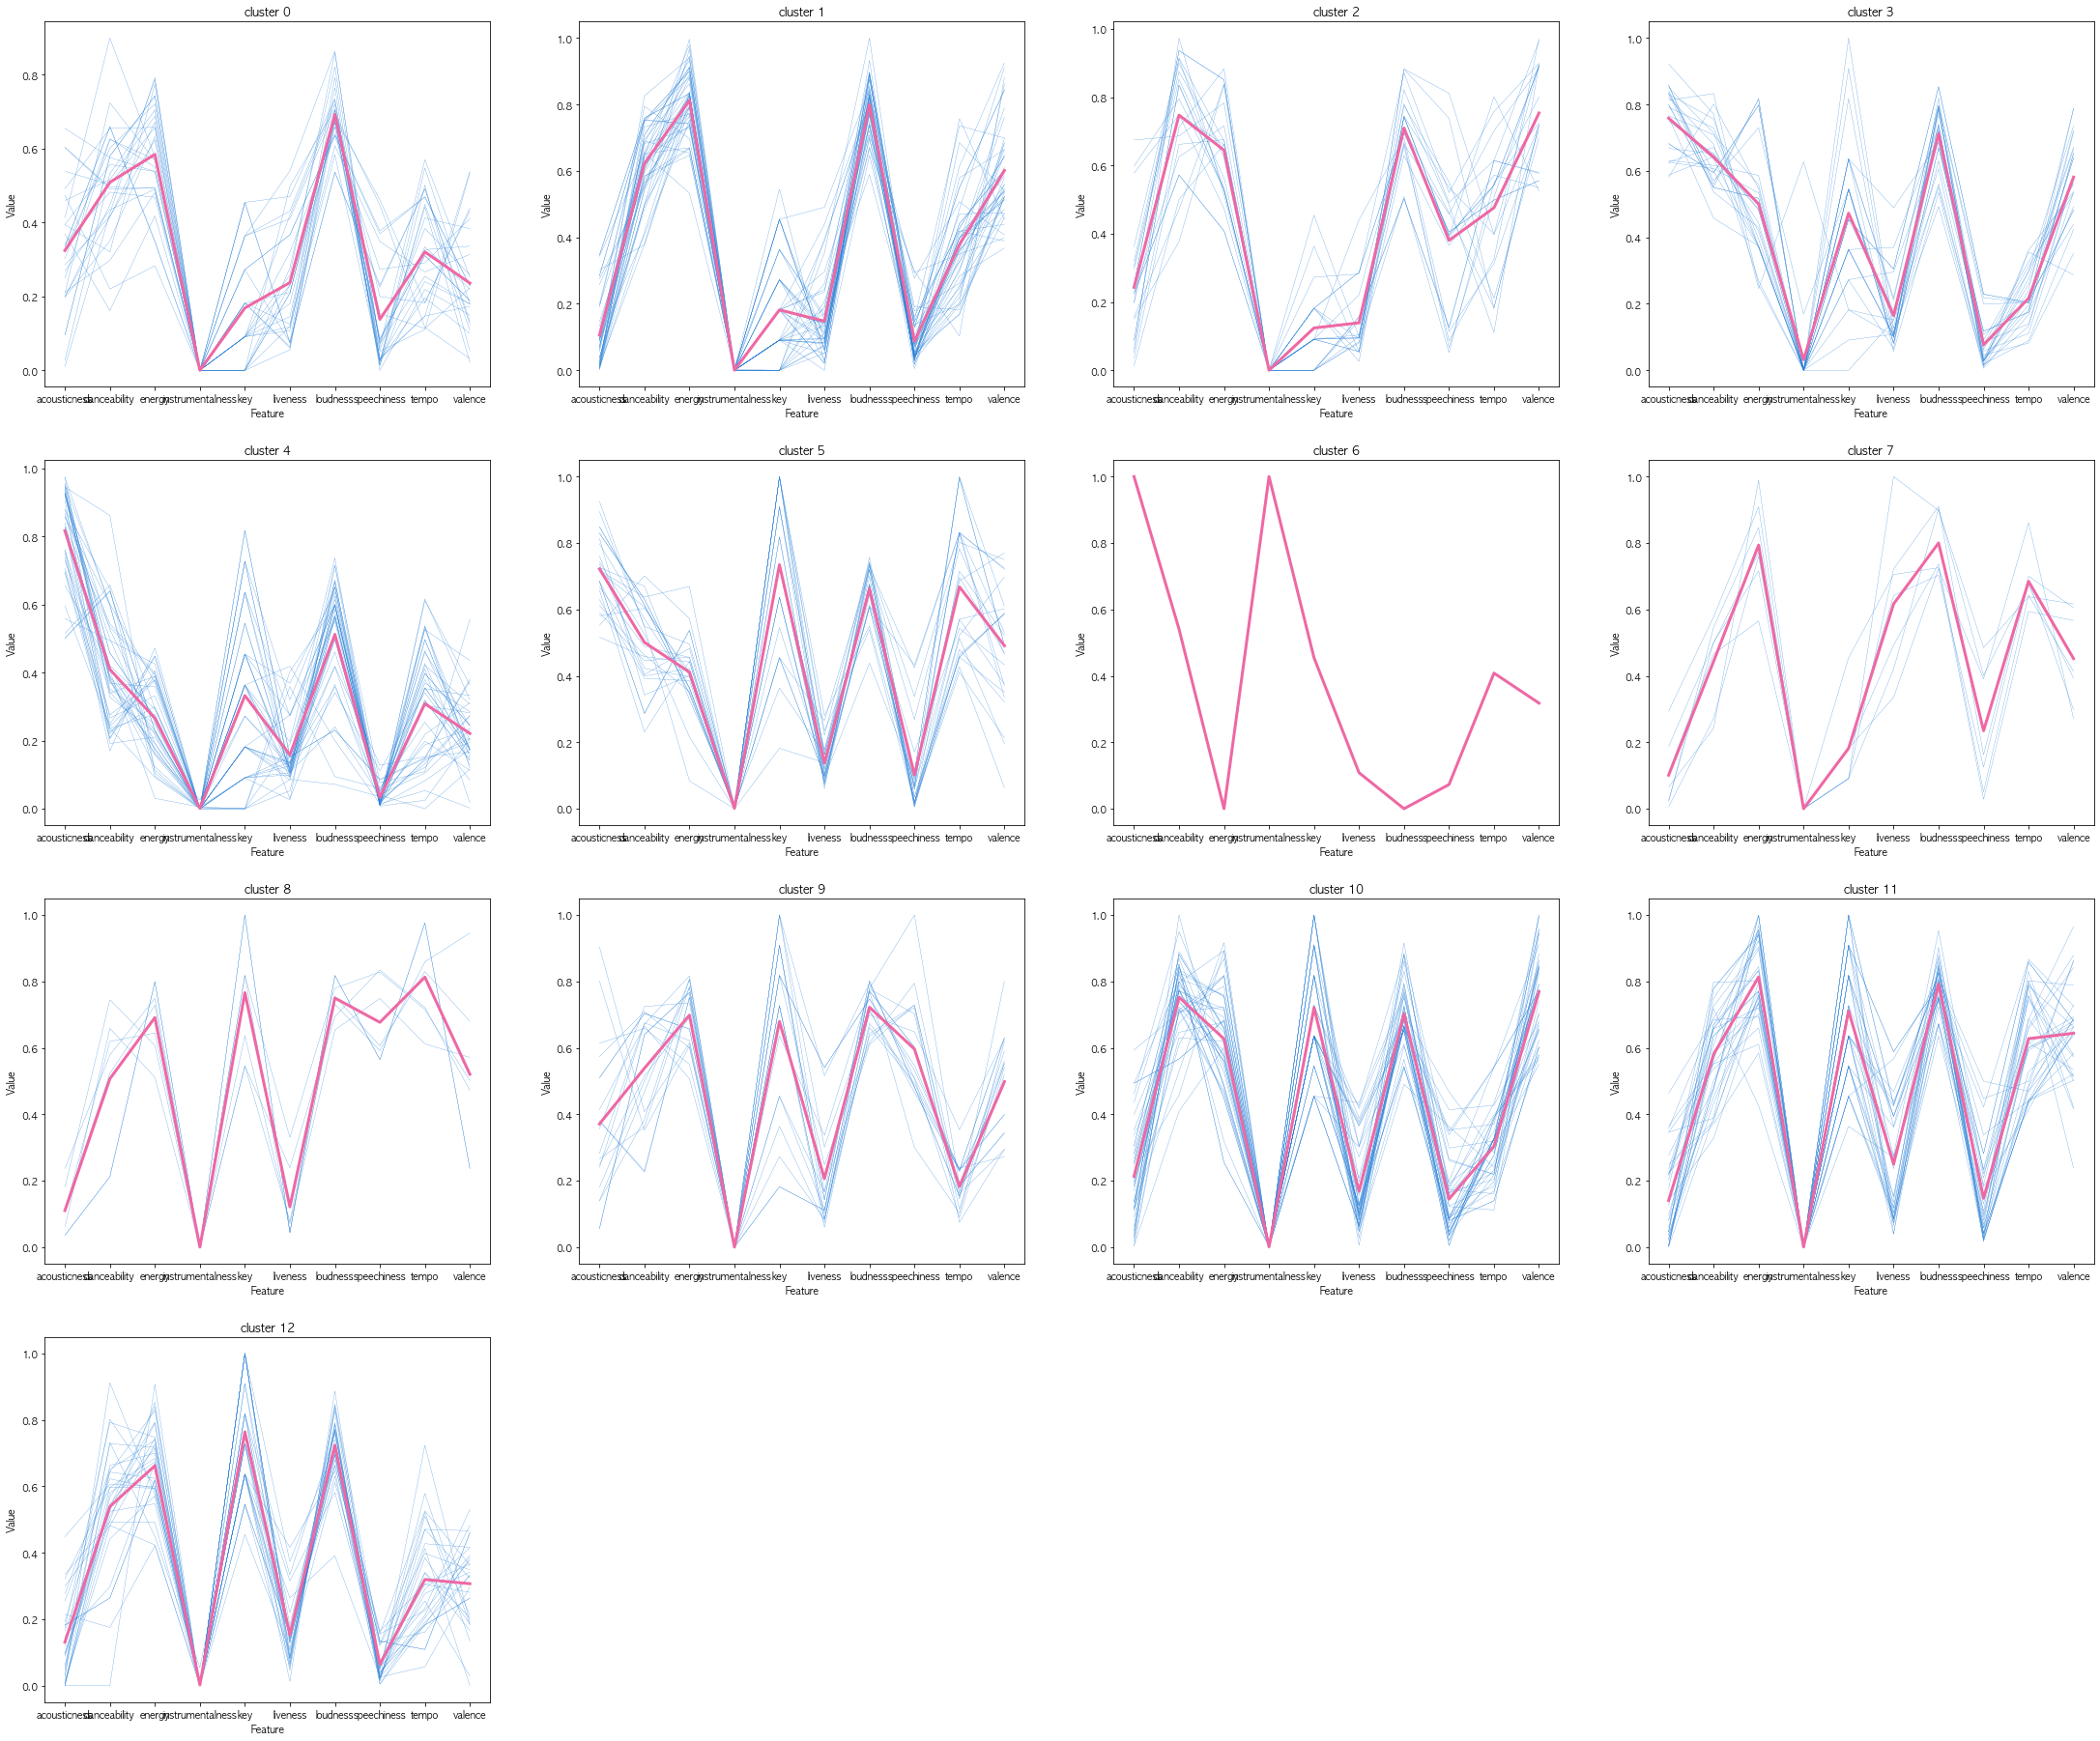

In [7]:
observer.kmeans.draw_cluster()

## 1. Intro

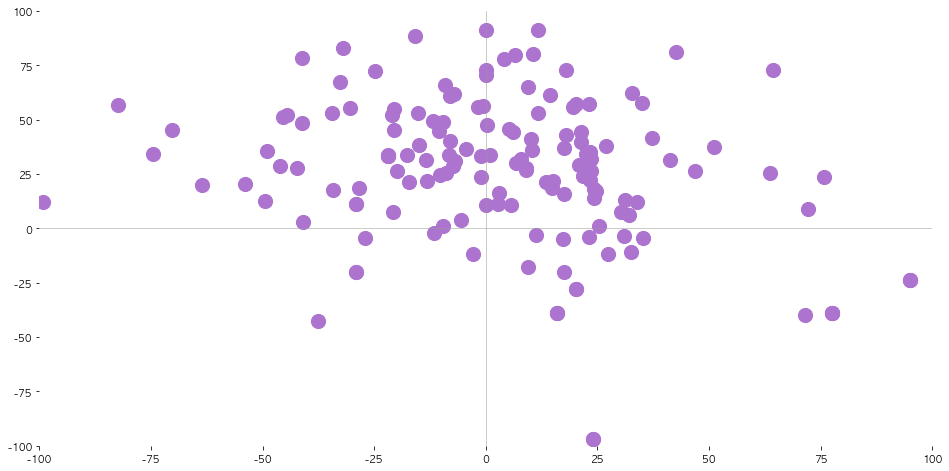

In [60]:
Demo2.pt1()

## 2. New Mailbox Map Making

### 우체통 지도가 완성되었습니다.

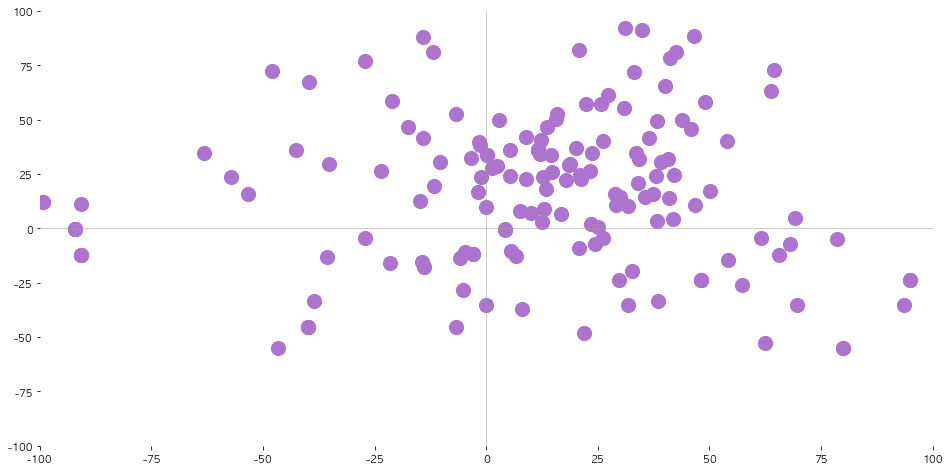

### 아래의 SeedZone Clustering 결과를 토대로 만들어졌어요.

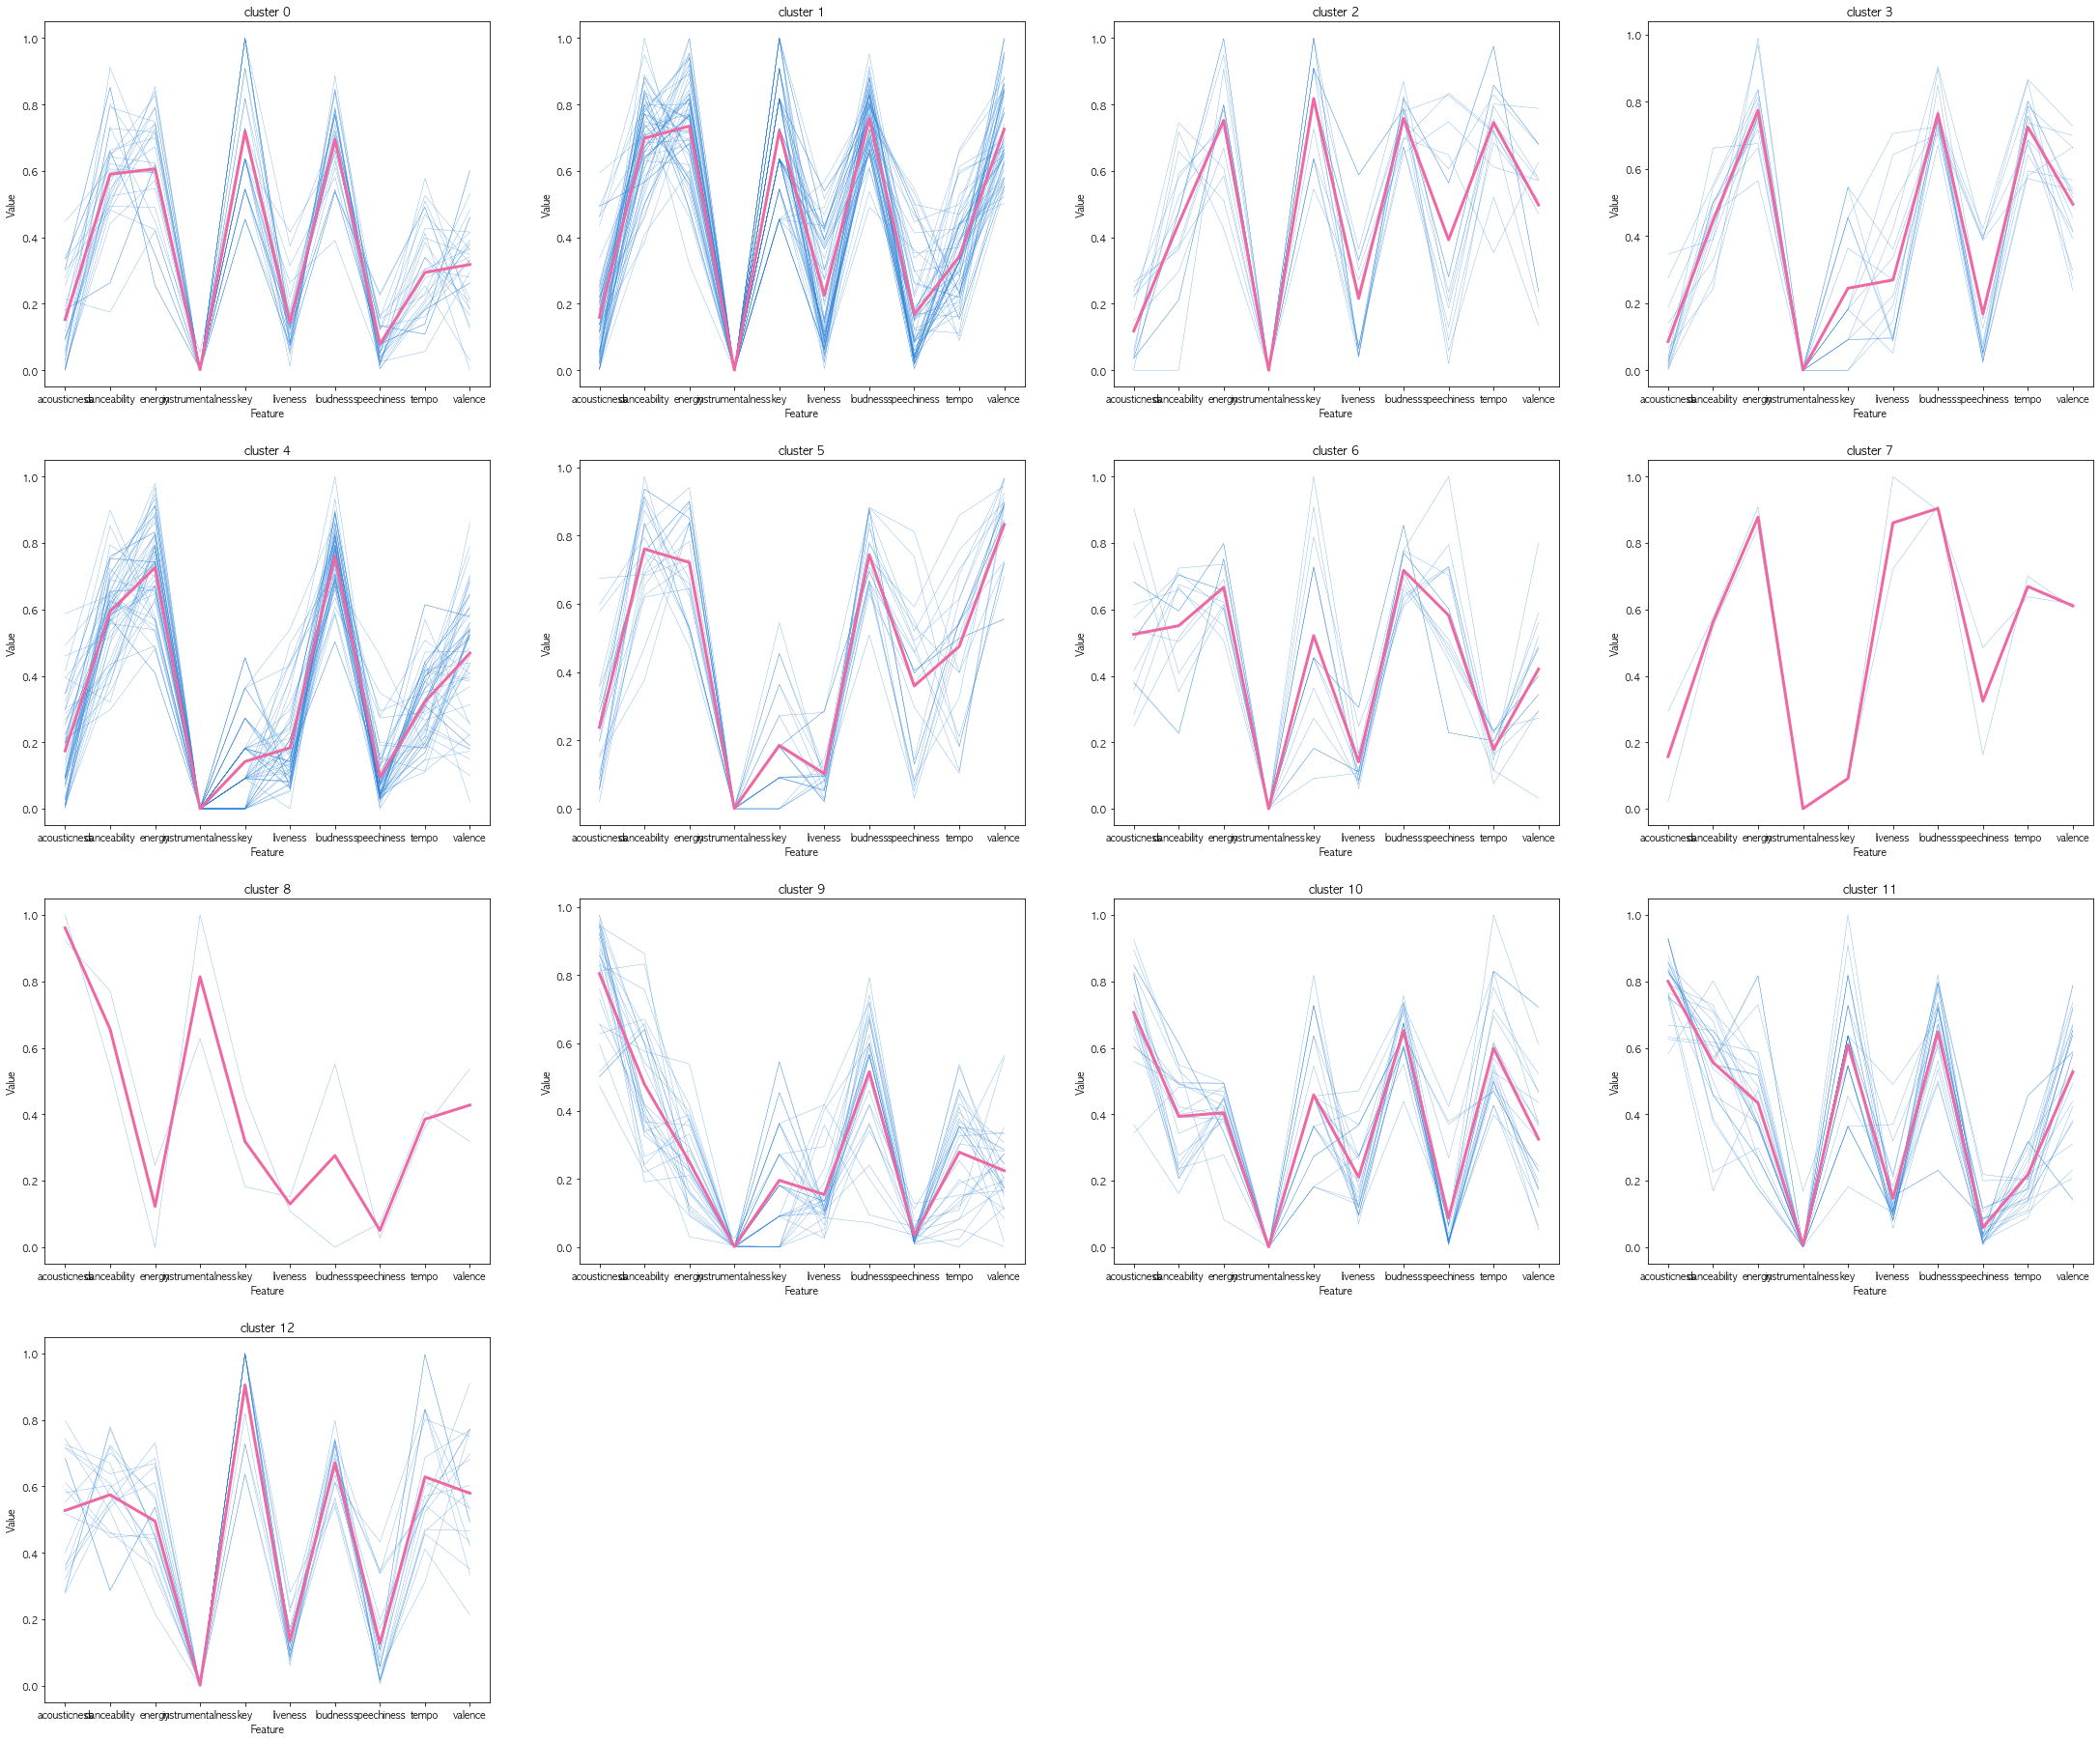

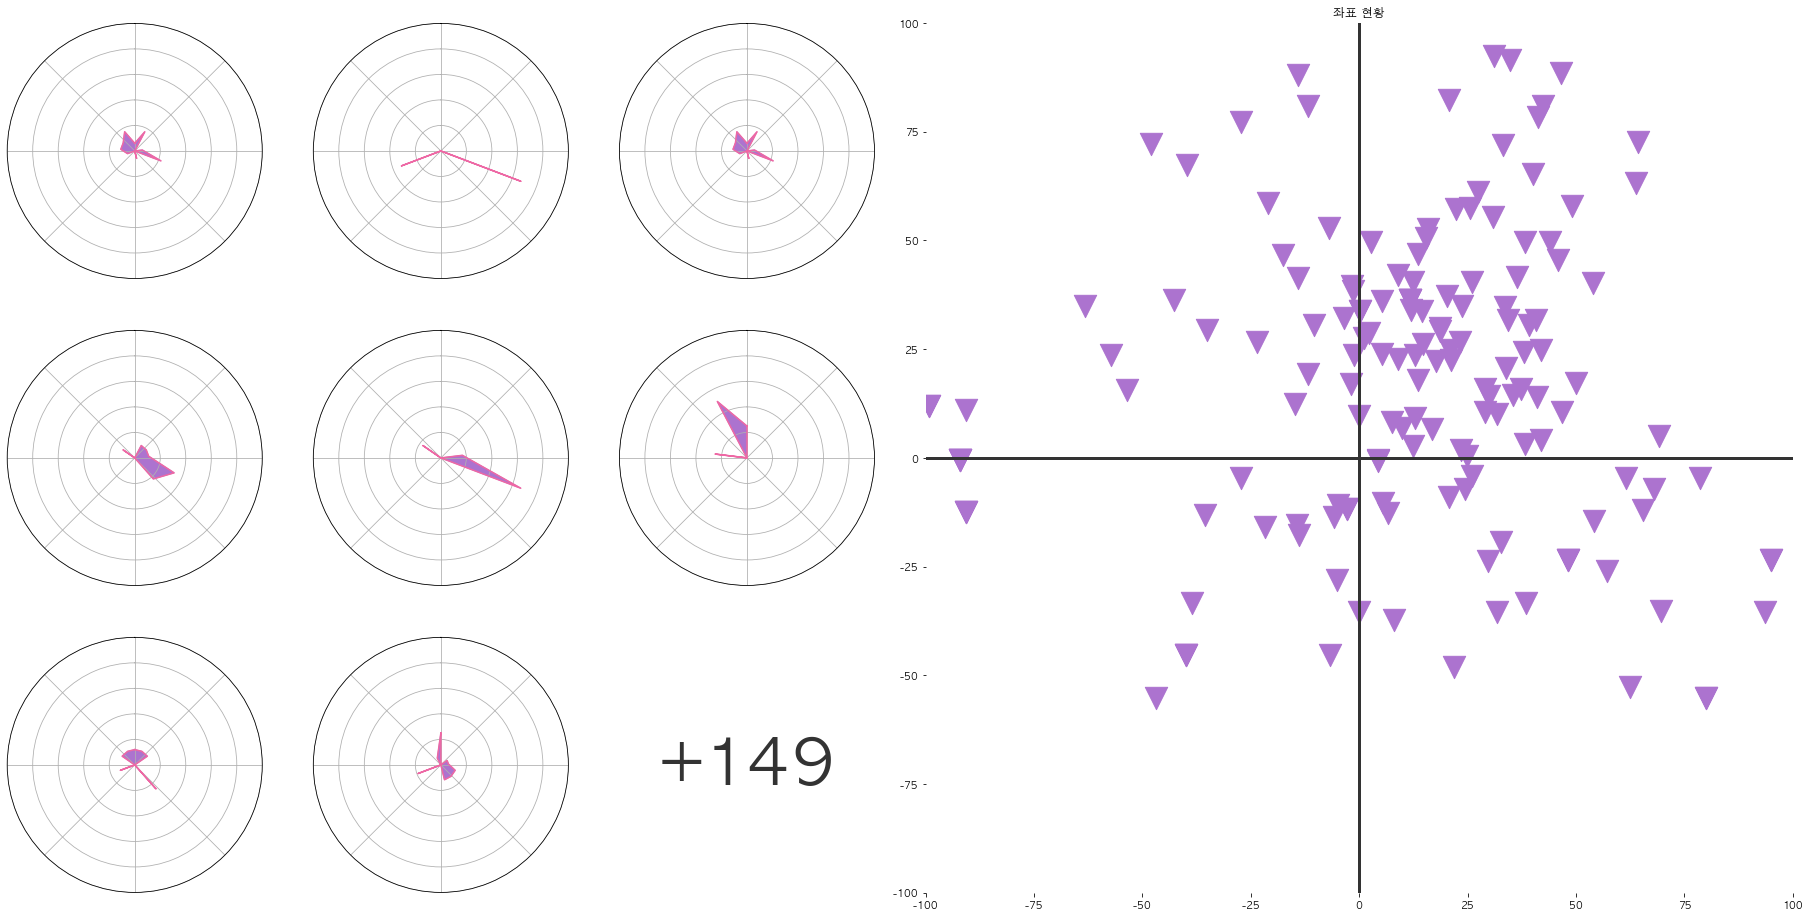

In [63]:
Demo2.pt2()

In [80]:
import math as mt
import numpy as np

quadrant_check = [[1, 1], [1, -1], [-1, -1], [-1, 1]]


def get_quadrant(angle):
    chk_angle = [0, 90, 180, 270]
    if angle in chk_angle:
        return -1
    else:
        if angle < 90:
            return 0
        elif angle < 180:
            return 1
        elif angle < 270:
            return 2
        elif angle < 360:
            return 3


def check_guadrant(angle, point):
    if angle == 0:
        return [0, point[1]]
    elif angle == 90:
        return [point[1], 0]
    elif angle == 180:
        return [0, point[1] * -1]
    elif angle == 270:
        return [point[1] * -1, 0]


def get_coord(data):
    K = len(data)
    angles = np.array([x/float(K)*(2*mt.pi) for x in range(K)])
#     print(angles)
    non_zero_labels = data != 0

    x = angles[non_zero_labels]
    y = data[non_zero_labels]

    point = np.array([[x[i], y[i]] for i, _ in enumerate(x)])
    point = point.reshape(-1, 2)

    for idx, pt in enumerate(point):
        rad = pt[0]
        ang = rad / mt.pi * 180
#         print(ang)

        dis = pt[1]
        quad = get_quadrant(ang)
        if quad == -1:
            point[idx] = check_guadrant(ang, pt)
        else:
            if (ang < 90) or \
                    (ang > 180 and ang < 270):
                ang = 90 - (ang % 90)
            else:
                ang = ang % 90
            rad = ang * mt.pi / 180

            quad = quadrant_check[quad]
            x = dis * mt.cos(rad) * quad[0]  # get X
            y = dis * mt.sin(rad) * quad[1]  # get Y

            point[idx] = [x, y]
            
    return point

#     return point.sum(axis=0)

In [82]:
points = get_coord(np.array([10, 0, 0, 10, 40, 30, 10, 0, 0, 0, 0, 0, 0]))
# [10, 0, 0, 10, 40, 30, 10, 0, 0, 0, 0, 0, 0]

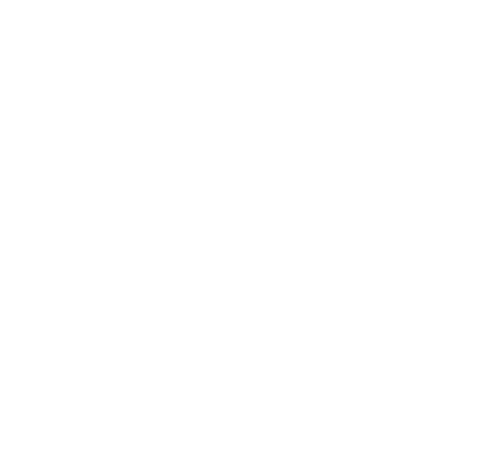

In [122]:
sums = np.array([[0,0]])
memory = np.array([0,0])
    
for p in points:
    sums = np.append(sums,p)
    sums = sums.reshape(-1, 2)    
    
    _sum = sums.sum(axis=0)
    
    memory = np.append(memory,_sum).reshape(-1, 2)
    
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('white')

for idx, m in enumerate(memory):
    plt.scatter(m[0], m[1], s=300, color='white',alpha=((idx + 1) / len(memory)))
    
ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='y', colors='white')

plt.savefig("/Users/formegusto/Desktop/generate_coordinates.png", transparent=True)

In [66]:
[0,28,55,83,111,138,166,194,222,249,277,305,332]

[0, 28, 55, 83, 111, 138, 166, 194, 222, 249, 277, 305, 332]

## 3. Radius Test

[104 106 101 100  99]
[[33.0733238  71.9029094 ]
 [49.0028184  57.94882875]
 [41.14919329 78.40323734]
 [27.31161575 61.22658983]
 [30.85553601 55.29803873]]
[[-99.27088741  12.05366803]
 [-99.27088741  12.05366803]
 [-90.70081485 -12.39374786]
 [-90.70081485 -12.39374786]
 [-90.70081485 -12.39374786]]
6293280667dfb8fb69d453fe
[ObjectId('6293280067dfb8fb69d453f8') ObjectId('629327f567dfb8fb69d453e9')
 ObjectId('629327c167dfb8fb69d453de') ObjectId('629327f467dfb8fb69d453e8')
 ObjectId('62976a0798ab635abd175b5f')]
[ObjectId('6295b958317d54d61fddad40') ObjectId('62963fb3964d49985a8708c9')
 ObjectId('6295aa0a317d54d61fddad2d') ObjectId('62959f1b317d54d61fddad23')
 ObjectId('62959e6b317d54d61fddad21')]


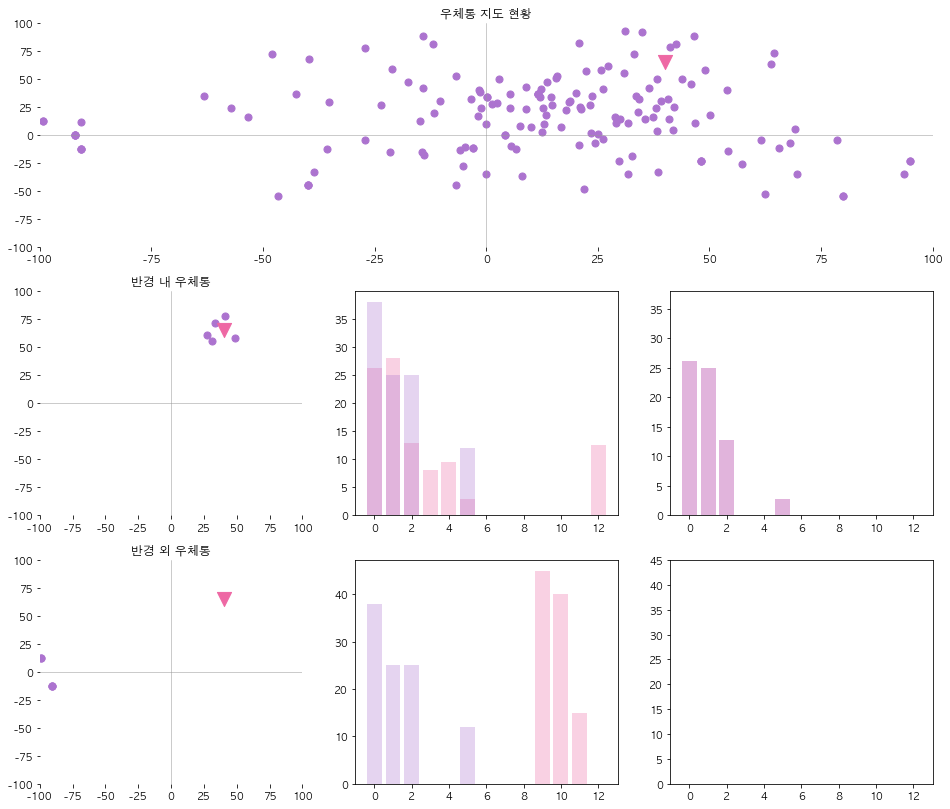

In [29]:
Demo2.pt3()

In [6]:
# 629327f467dfb8fb69d453e8
# [ObjectId('62976a0598ab635abd175b5c') ObjectId('6298a4b735dfb4f3a87f432b')
#  ObjectId('62976a0798ab635abd175b5f') ObjectId('6293280067dfb8fb69d453f8')
#  ObjectId('6293280667dfb8fb69d453fe')]
# [ObjectId('62963fb3964d49985a8708c9') ObjectId('6298a338bed59edaf127eeab')
#  ObjectId('62959f1b317d54d61fddad23') ObjectId('6295aa0a317d54d61fddad2d')
#  ObjectId('62959e6b317d54d61fddad21')]

In [16]:
mailbox_docs = db.mailbox.find({"_id": {"$ne": my_id}})

mailboxes = np.array([_ for _ in mailbox_docs])

In [17]:
from sklearn.metrics import euclidean_distances as euc

target_mailbox = my_mailbox
points = np.array([[_['point']['x'], _['point']['y']] for _ in mailboxes])
target_points = np.array(
    [[target_mailbox['point']['x'], target_mailbox['point']['y']]])

In [18]:
_euc = euc(target_points, points)[0]

In [19]:
ids = np.array([_['_id'] for _ in mailboxes])

In [21]:
mailboxes[_euc.argsort()[:5]]

array([{'_id': ObjectId('62976a0398ab635abd175b5a'), 'title': '자동생성 우체통 102', 'description': 'Test', 'image': '', 'tracks': [{'trackId': '6gIFRFKWuwF0J8maUzh54d', 'trackName': 'winter night (Feat. DUT2)', 'artistIds': '1Ri5P0CfdNxdIkHX6es8Xd', 'artistNames': 'Polodared', 'image': 'https://i.scdn.co/image/ab67616d0000b27327759de47b084beca31a5bbf'}, {'trackId': '0cNc0bSxmRVhAUJVYEd2Qk', 'trackName': 'Leave You Alone', 'artistIds': '7HkdQ0gt53LP4zmHsL0nap', 'artistNames': 'Ella Mai', 'image': 'https://i.scdn.co/image/ab67616d0000b2739af92b0ea5e0d6859ee46b0a'}, {'trackId': '6mrHRESWNiMu6UJviv8KpP', 'trackName': 'Pick up the phone', 'artistIds': '3ghCvruix2FYZ81DHRlOt1', 'artistNames': 'BLOO', 'image': 'https://i.scdn.co/image/ab67616d0000b27307559166a67b1ec882a3b121'}, {'trackId': '0YiGjs5faGA0bBQl3Gu6mv', 'trackName': 'MARi GOLD (feat. DAY H & Rei)', 'artistIds': '2oRXMUJRxf2HvVTAdOYFt0', 'artistNames': 'Agustin', 'image': 'https://i.scdn.co/image/ab67616d0000b2735b22df8cf3afcefa220cd6f1'

In [22]:
mailboxes[_euc.argsort()[-5:]]

array([{'_id': ObjectId('6296403e964d49985a8708ce'), 'title': 'Test', 'description': 'Test', 'image': '', 'tracks': [{'trackId': '1iyq8iQzqjRs7Aub5Dmn7N', 'trackName': 'Handhold', 'artistIds': '7c1HgFDe8ogy5NOZ1ANCJQ', 'artistNames': 'Car, the garden', 'image': 'https://i.scdn.co/image/ab67616d0000b273956e5ad1d9ae34dd548aaa62'}, {'trackId': '046Gh1kXtPynYPaKep5M8E', 'trackName': 'So life goes on', 'artistIds': '5z8B2oTjiZbpbMB6rAfPGl', 'artistNames': 'Heo Hoy Kyung', 'image': 'https://i.scdn.co/image/ab67616d0000b273f538596da78b3e822f05bf53'}, {'trackId': '5EFxoz2Ub0FHU33GpE9Eke', 'trackName': "Being Someone's Mind", 'artistIds': '7zdCvtTQdMCj37CuQxkyQf', 'artistNames': 'Yebit', 'image': 'https://i.scdn.co/image/ab67616d0000b27389f9110cb4eaeaba0322a0a4'}, {'trackId': '3kNGEbIhTWU0L6RslcXPXr', 'trackName': 'Fully Empty', 'artistIds': '0LyfQWJT6nXafLPZqxe9Of', 'artistNames': 'Various Artists', 'image': 'https://i.scdn.co/image/ab67616d0000b2735c55c8e80a6db70a4254c43a'}], 'createdAt': '20

In [23]:
ids[_euc.argsort()[-5:]]

array([ObjectId('6296403e964d49985a8708ce'),
       ObjectId('62964109964d49985a8708d2'),
       ObjectId('62963dfb7622882320b85cd5'),
       ObjectId('6295b958317d54d61fddad40'),
       ObjectId('62963fb3964d49985a8708c9')], dtype=object)

In [3]:
from demo.lib import DB
from bson import ObjectId
import numpy as np

db = DB()

my_id = ObjectId('6293280667dfb8fb69d453fe')
in_ids = [ObjectId('6293280067dfb8fb69d453f8'), ObjectId('629327f567dfb8fb69d453e9'),
 ObjectId('629327c167dfb8fb69d453de'), ObjectId('629327f467dfb8fb69d453e8'),
 ObjectId('62976a0798ab635abd175b5f')]
out_ids = [ObjectId('6295b958317d54d61fddad40'), ObjectId('62963fb3964d49985a8708c9'),
 ObjectId('6295aa0a317d54d61fddad2d'), ObjectId('62959f1b317d54d61fddad23'),
 ObjectId('62959e6b317d54d61fddad21')]

In [4]:
my_mailbox = db.mailbox.find_one({"_id": my_id})

result = db.mailbox.find({"_id": { "$in": in_ids } })
in_mailboxes = [_ for _ in result]

result = db.mailbox.find({"_id": { "$in": out_ids } })
out_mailboxes = [_ for _ in result]

In [5]:
my_point = my_mailbox['point']
in_point = np.array([[_['point']['x'], _['point']['y']] for _ in in_mailboxes])
out_point = np.array([[_['point']['x'], _['point']['y']] for _ in out_mailboxes])

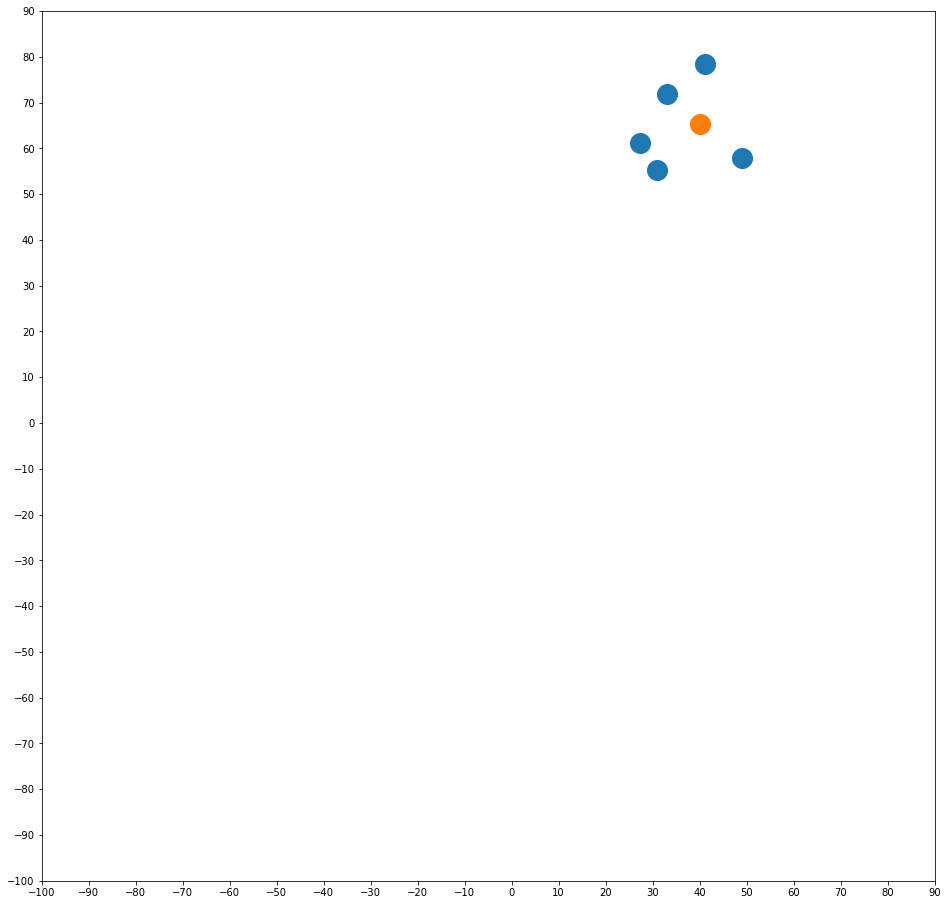

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,16))

plt.scatter(in_point[:, 0],in_point[:, 1], s=400, color="white")
plt.scatter(my_point['x'], my_point['y'], s=400, )

plt.xticks(range(-100, 100, 10))
plt.yticks(range(-100, 100, 10))

plt.show()

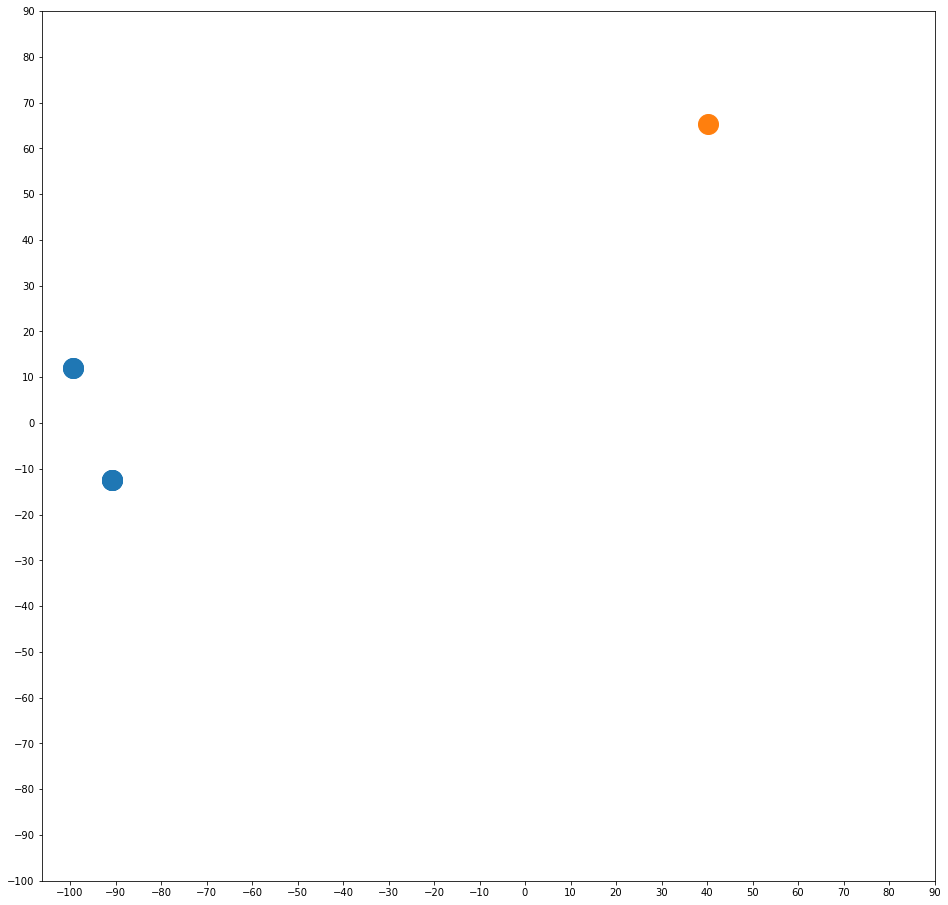

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,16))

plt.scatter(out_point[:, 0],out_point[:, 1], s=400, )
plt.scatter(my_point['x'], my_point['y'], s=400)

plt.xticks(range(-100, 100, 10))
plt.yticks(range(-100, 100, 10))

plt.show()

In [8]:
out_point

array([[-90.70081485, -12.39374786],
       [-90.70081485, -12.39374786],
       [-90.70081485, -12.39374786],
       [-99.27088741,  12.05366803],
       [-99.27088741,  12.05366803]])

In [9]:
in_track_ids = [[track['trackId'] for track in _['tracks']] for _ in in_mailboxes]
in_track_features = [  [
   np.array(list(anal.values()))[2:-1].tolist()
   for anal in db.seed_zone.find({"trackId": {"$in": in_track}})
   ]
   for in_track in in_track_ids
]

In [10]:
out_track_ids = [[track['trackId'] for track in _['tracks']] for _ in out_mailboxes]
out_track_features = [  [
   np.array(list(anal.values()))[2:-1].tolist()
   for anal in db.seed_zone.find({"trackId": {"$in": out_track}})
   ]
   for out_track in out_track_ids
]

In [11]:
my_track_ids = [track['trackId'] for track in my_mailbox['tracks']]
my_track_features = np.array([
   np.array(list(anal.values()))[2:-1].tolist()
   for anal in db.seed_zone.find({"trackId": {"$in": my_track_ids}})
   ])

In [12]:
my_track_features.shape

(8, 10)

In [13]:
norms = db.cluster_zone.find().sort("version", -1)[0]['norm']
norms = np.array(list(norms.values())).T

In [14]:
norm_mtf = (my_track_features - norms[0]) / (norms[1] - norms[0])

In [15]:
norm_itf = [(in_track_feature - norms[0]) / (norms[1] - norms[0]) for in_track_feature in in_track_features]

In [16]:
norm_otf = [(out_track_feature - norms[0]) / (norms[1] - norms[0]) for out_track_feature in out_track_features]

In [17]:
norm_mtf_mean = norm_mtf.mean(axis=0)
norm_mtf_mean

array([1.85953520e-01, 6.48947011e-01, 6.23300811e-01, 3.85651070e-04,
       6.93181818e-01, 2.17546859e-01, 7.22922594e-01, 2.10593842e-01,
       3.86047214e-01, 5.61701165e-01])

In [18]:
norm_itf_mean = [ni.mean(axis=0) for ni in norm_itf]
norm_itf_mean

[array([0.26033693, 0.49184783, 0.68866477, 0.        , 0.81818182,
        0.19129939, 0.72049446, 0.34447005, 0.26820906, 0.50627757]),
 array([0.22559638, 0.63528727, 0.62774454, 0.00181044, 0.68831169,
        0.14667463, 0.73027007, 0.23107307, 0.49530929, 0.64257437]),
 array([1.52573633e-01, 5.34782609e-01, 6.58627494e-01, 1.14010695e-06,
        6.00000000e-01, 1.06231003e-01, 7.66418130e-01, 1.55131965e-01,
        5.00228085e-01, 5.19737586e-01]),
 array([3.28561297e-01, 6.91964286e-01, 6.15372569e-01, 6.00458365e-04,
        6.23376623e-01, 2.13634390e-01, 7.09688722e-01, 1.03028308e-01,
        4.17060257e-01, 7.35162474e-01]),
 array([9.61920615e-02, 6.83423913e-01, 7.91712344e-01, 2.58823529e-04,
        4.24242424e-01, 9.67578521e-02, 7.06661434e-01, 7.88297724e-02,
        3.12232431e-01, 5.09482336e-01])]

In [19]:
norm_otf_mean = [no.mean(axis=0) for no in norm_otf]
norm_otf_mean

[array([8.48326096e-01, 4.32404891e-01, 3.65270774e-01, 4.47593583e-06,
        1.59090909e-01, 1.85283688e-01, 5.86529972e-01, 1.66527021e-02,
        1.11425498e-01, 2.20676394e-01]),
 array([8.48326096e-01, 4.32404891e-01, 3.65270774e-01, 4.47593583e-06,
        1.59090909e-01, 1.85283688e-01, 5.86529972e-01, 1.66527021e-02,
        1.11425498e-01, 2.20676394e-01]),
 array([8.48326096e-01, 4.32404891e-01, 3.65270774e-01, 4.47593583e-06,
        1.59090909e-01, 1.85283688e-01, 5.86529972e-01, 1.66527021e-02,
        1.11425498e-01, 2.20676394e-01]),
 array([0.73608741, 0.42255435, 0.39706205, 0.        , 0.81818182,
        0.07066869, 0.64289218, 0.02178467, 0.42728967, 0.06345436]),
 array([0.73608741, 0.42255435, 0.39706205, 0.        , 0.81818182,
        0.07066869, 0.64289218, 0.02178467, 0.42728967, 0.06345436])]

In [20]:
(np.abs(norm_mtf_mean - norm_itf_mean) / norm_mtf_mean).mean() * 100

32.18711963686053

In [21]:
(np.abs(norm_mtf_mean - norm_otf_mean) / norm_mtf_mean).mean() * 100

81.97736409618102